# Autoencoder for dim064 dataset

In [1]:
import pandas as pd
import numpy as np
from keras.models import Model,load_model
from keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
from keras import regularizers
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.


In [3]:
#read data
x_train = pd.read_csv('./dataset/dim064_train.csv')
x_test = pd.read_csv('./dataset/dim064_test.csv')
y_train = pd.read_csv('./dataset/dim064_train_label.csv')
y_train = np.asarray(y_train)
y_test = pd.read_csv('./dataset/dim064_test_label.csv')
y_test = np.asarray(y_test)

In [4]:
# ## Normalization
# #x_train.max().max()
# x_train = x_train.astype('float32') / 157.
# x_test = x_test.astype('float32') / 157.

# Basic Autoencoder

In [255]:
########### Basic Autoencoder ##########
input_dim = x_train.shape[1]
input_layer = Input(shape=(input_dim, ))

encoding_dim = 12
#learning_rate = 1e-7

encoded = Dense(encoding_dim, activation='relu')(input_layer)

decoded = Dense(input_dim, activation='sigmoid')(encoded)

# implenment an autoencoder, creat encoder and decoder

autoencoder = Model(input_layer, decoded)

encoder = Model(input_layer, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
                                             
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [257]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_66 (InputLayer)        (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 12)                780       
_________________________________________________________________
dense_21 (Dense)             (None, 64)                832       
Total params: 1,612
Trainable params: 1,612
Non-trainable params: 0
_________________________________________________________________


In [140]:


ae_train = autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=128,
                shuffle=False,
                validation_data=(x_test, x_test)
                ).history

Train on 614 samples, validate on 410 samples
Epoch 1/200
614/614 [==============================] - 1s 2ms/step - loss: 0.0677 - val_loss: 0.0658
Epoch 2/200
614/614 [==============================] - 0s 20us/step - loss: 0.0639 - val_loss: 0.0626
Epoch 3/200
614/614 [==============================] - 0s 22us/step - loss: 0.0611 - val_loss: 0.0604
Epoch 4/200
614/614 [==============================] - 0s 23us/step - loss: 0.0593 - val_loss: 0.0590
Epoch 5/200
614/614 [==============================] - 0s 25us/step - loss: 0.0582 - val_loss: 0.0580
Epoch 6/200
614/614 [==============================] - 0s 23us/step - loss: 0.0574 - val_loss: 0.0573
Epoch 7/200
614/614 [==============================] - 0s 25us/step - loss: 0.0568 - val_loss: 0.0568
Epoch 8/200
614/614 [==============================] - 0s 22us/step - loss: 0.0563 - val_loss: 0.0563
Epoch 9/200
614/614 [==============================] - 0s 25us/step - loss: 0.0558 - val_loss: 0.0559
Epoch 10/200
614/614 [===============

614/614 [==============================] - 0s 28us/step - loss: 0.0189 - val_loss: 0.0193
Epoch 160/200
614/614 [==============================] - 0s 27us/step - loss: 0.0189 - val_loss: 0.0192
Epoch 161/200
614/614 [==============================] - 0s 28us/step - loss: 0.0188 - val_loss: 0.0192
Epoch 162/200
614/614 [==============================] - 0s 37us/step - loss: 0.0188 - val_loss: 0.0191
Epoch 163/200
614/614 [==============================] - 0s 24us/step - loss: 0.0187 - val_loss: 0.0191
Epoch 164/200
614/614 [==============================] - 0s 25us/step - loss: 0.0187 - val_loss: 0.0190
Epoch 165/200
614/614 [==============================] - 0s 22us/step - loss: 0.0187 - val_loss: 0.0190
Epoch 166/200
614/614 [==============================] - 0s 25us/step - loss: 0.0186 - val_loss: 0.0190
Epoch 167/200
614/614 [==============================] - 0s 24us/step - loss: 0.0186 - val_loss: 0.0189
Epoch 168/200
614/614 [==============================] - 0s 28us/step - loss: 

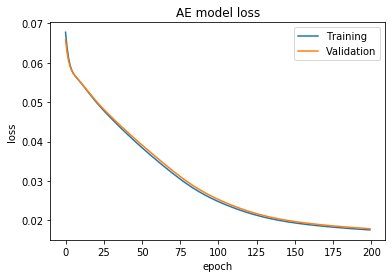

In [141]:
# AE loss
plt.plot(ae_train['loss'])
plt.plot(ae_train['val_loss'])
plt.title('AE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [142]:
loss = pd.DataFrame(ae_train['loss'])
loss.describe()

,0
count,200.000000
mean,0.029941
std,0.012591
min,0.017556
25%,0.019372
50%,0.024825
75%,0.038516
max,0.067737


In [143]:
val_loss = pd.DataFrame(ae_train['val_loss'])
val_loss.describe()

,0
count,200.000000
mean,0.030343
std,0.012496
min,0.017862
25%,0.019718
50%,0.025362
75%,0.039185
max,0.065786


In [144]:
# create encoded data
encoded_data = encoder.predict(x_test)
#decoded_data = decoder.predict(encoded_data)

# transform to SOM input type
encoded_som = pd.DataFrame(encoded_data)
#decoded_som = pd.DataFrame(decoded_data)

In [145]:
encoded_som.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.647027,0.000000,0.660599,0.0,0.0,0.0,0.0,1.020517,1.616053,3.319179,0.604015
1,0.0,4.711798,0.422102,0.877366,0.0,0.0,0.0,0.0,1.729026,1.916097,1.539384,0.003276
2,0.0,3.461904,0.307894,0.877388,0.0,0.0,0.0,0.0,0.056192,0.056966,0.000000,1.680876
3,0.0,0.261865,0.605682,1.406316,0.0,0.0,0.0,0.0,2.325239,0.037095,1.959214,2.992734
4,0.0,1.444584,0.059368,3.844914,0.0,0.0,0.0,0.0,0.000000,0.447486,2.453401,0.213089


In [146]:
nonzero = list(map(lambda i: any(encoded_data[:,i] != 0), range(encoded_data.shape[1])))

encoded_som_nonzero = pd.DataFrame(encoded_data[:,nonzero])

encoded_som_nonzero.tail()

,0,1,2,3,4,5,6
405,1.649090,0.000000,0.648386,1.037058,1.621922,3.304917,0.589147
406,1.053474,0.010654,0.543970,3.214760,0.000000,1.209431,0.661148
407,2.075082,0.511508,0.217459,0.000000,2.623912,1.599327,0.611574
408,1.443019,0.057794,3.863482,0.000000,0.415654,2.488883,0.206009
409,0.453755,0.000000,0.000000,0.000000,0.464154,0.000000,0.000000


In [147]:
encoded_data.mean()

0.77377146

In [148]:
encoded_som_nonzero.to_csv(path_or_buf='./dim064_AE_encoded.csv',index= False)

# Sparse Autoencoder

In [258]:
########### Sparse Autoencoder ##########
input_dim = x_train.shape[1]
input_layer = Input(shape=(input_dim, ))

encoding_dim = 12
#learning_rate = 1e-7

encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-7))(input_layer)

decoded = Dense(input_dim, activation='sigmoid')(encoded)

# implenment an autoencoder, creat encoder and decoder

autoencoder = Model(input_layer, decoded)

encoder = Model(input_layer, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
                                             
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [259]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_68 (InputLayer)        (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 12)                780       
_________________________________________________________________
dense_23 (Dense)             (None, 64)                832       
Total params: 1,612
Trainable params: 1,612
Non-trainable params: 0
_________________________________________________________________


In [158]:


ae_train = autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=128,
                shuffle=False,
                validation_data=(x_test, x_test)
                ).history

Train on 614 samples, validate on 410 samples
Epoch 1/200
614/614 [==============================] - 1s 2ms/step - loss: 0.0669 - val_loss: 0.0645
Epoch 2/200
614/614 [==============================] - 0s 23us/step - loss: 0.0631 - val_loss: 0.0614
Epoch 3/200
614/614 [==============================] - 0s 21us/step - loss: 0.0603 - val_loss: 0.0592
Epoch 4/200
614/614 [==============================] - 0s 22us/step - loss: 0.0585 - val_loss: 0.0579
Epoch 5/200
614/614 [==============================] - 0s 26us/step - loss: 0.0574 - val_loss: 0.0571
Epoch 6/200
614/614 [==============================] - 0s 26us/step - loss: 0.0568 - val_loss: 0.0566
Epoch 7/200
614/614 [==============================] - 0s 31us/step - loss: 0.0563 - val_loss: 0.0562
Epoch 8/200
614/614 [==============================] - 0s 26us/step - loss: 0.0559 - val_loss: 0.0558
Epoch 9/200
614/614 [==============================] - 0s 18us/step - loss: 0.0555 - val_loss: 0.0554
Epoch 10/200
614/614 [===============

Epoch 80/200
614/614 [==============================] - 0s 21us/step - loss: 0.0287 - val_loss: 0.0284
Epoch 81/200
614/614 [==============================] - 0s 25us/step - loss: 0.0284 - val_loss: 0.0281
Epoch 82/200
614/614 [==============================] - 0s 21us/step - loss: 0.0282 - val_loss: 0.0279
Epoch 83/200
614/614 [==============================] - 0s 18us/step - loss: 0.0279 - val_loss: 0.0277
Epoch 84/200
614/614 [==============================] - 0s 24us/step - loss: 0.0277 - val_loss: 0.0274
Epoch 85/200
614/614 [==============================] - 0s 19us/step - loss: 0.0275 - val_loss: 0.0272
Epoch 86/200
614/614 [==============================] - 0s 20us/step - loss: 0.0272 - val_loss: 0.0270
Epoch 87/200
614/614 [==============================] - 0s 21us/step - loss: 0.0270 - val_loss: 0.0268
Epoch 88/200
614/614 [==============================] - 0s 18us/step - loss: 0.0268 - val_loss: 0.0266
Epoch 89/200
614/614 [==============================] - 0s 17us/step - lo

Epoch 159/200
614/614 [==============================] - 0s 21us/step - loss: 0.0184 - val_loss: 0.0186
Epoch 160/200
614/614 [==============================] - 0s 22us/step - loss: 0.0184 - val_loss: 0.0186
Epoch 161/200
614/614 [==============================] - 0s 21us/step - loss: 0.0183 - val_loss: 0.0186
Epoch 162/200
614/614 [==============================] - 0s 29us/step - loss: 0.0183 - val_loss: 0.0185
Epoch 163/200
614/614 [==============================] - 0s 23us/step - loss: 0.0182 - val_loss: 0.0185
Epoch 164/200
614/614 [==============================] - 0s 35us/step - loss: 0.0182 - val_loss: 0.0184
Epoch 165/200
614/614 [==============================] - 0s 27us/step - loss: 0.0181 - val_loss: 0.0184
Epoch 166/200
614/614 [==============================] - 0s 25us/step - loss: 0.0181 - val_loss: 0.0183
Epoch 167/200
614/614 [==============================] - 0s 32us/step - loss: 0.0180 - val_loss: 0.0183
Epoch 168/200
614/614 [==============================] - 0s 30us

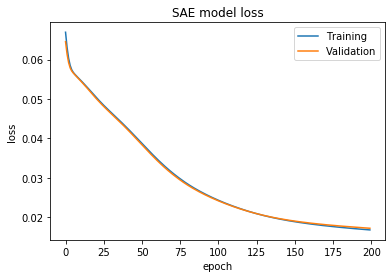

In [159]:
# SAE loss
plt.plot(ae_train['loss'])
plt.plot(ae_train['val_loss'])
plt.title('SAE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [160]:
loss = pd.DataFrame(ae_train['loss'])
loss.describe()

,0
count,200.000000
mean,0.029663
std,0.012844
min,0.016825
25%,0.018942
50%,0.024411
75%,0.038837
max,0.066921


In [161]:
val_loss = pd.DataFrame(ae_train['val_loss'])
val_loss.describe()

,0
count,200.000000
mean,0.029574
std,0.012601
min,0.017245
25%,0.019089
50%,0.024268
75%,0.038487
max,0.064528


In [162]:
# create encoded data
encoded_data = encoder.predict(x_test)
#decoded_data = decoder.predict(encoded_data)

# transform to SOM input type
encoded_som = pd.DataFrame(encoded_data)
#decoded_som = pd.DataFrame(decoded_data)

In [163]:
encoded_data.mean()

0.8168739

In [164]:
encoded_som.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.082953,1.719938,2.794215,1.231354,0.0,0.0,0.0,0.490155,0.000000,2.376120,3.638447
1,0.0,1.313083,1.477354,3.454328,1.329181,0.0,0.0,0.0,1.069223,1.353905,1.092889,0.000000
2,0.0,0.000000,0.200157,0.002742,1.066647,0.0,0.0,0.0,1.589930,0.704653,1.400739,0.359647
3,0.0,2.822837,1.277856,0.046526,0.000000,0.0,0.0,0.0,1.450487,0.502795,4.184638,1.976546
4,0.0,1.661711,1.961034,0.373459,1.882053,0.0,0.0,0.0,0.640876,0.000000,0.000000,3.539026


In [165]:
nonzero = list(map(lambda i: any(encoded_data[:,i] != 0), range(encoded_data.shape[1])))
encoded_som_nonzero = pd.DataFrame(encoded_data[:,nonzero])
encoded_som_nonzero.tail()

,0,1,2,3,4,5,6,7
405,1.092041,1.720317,2.794890,1.236804,0.482353,0.000000,2.367828,3.613643
406,2.303518,1.493060,1.155429,2.691460,1.473746,0.091799,3.651505,0.000000
407,0.005647,0.932236,2.223594,0.000000,0.293780,0.697548,0.259376,2.035564
408,1.660553,1.966380,0.358016,1.914140,0.637647,0.000000,0.000000,3.552371
409,0.000000,2.094141,0.000000,2.045001,1.704770,0.000000,0.236192,0.000000


In [166]:
encoded_som_nonzero.to_csv(path_or_buf='./dim064_SAE_encoded.csv',index= False)

# Contractive Autoencoder

In [47]:
########### Contractive Autoencoder ##########
input_dim = x_train.shape[1]
input_layer = Input(shape=(input_dim, ))

encoding_dim = 12
#learning_rate = 1e-7

encoded = Dense(encoding_dim, activation='relu', name = 'encoded')(input_layer)

decoded = Dense(input_dim, activation='sigmoid')(encoded)

# implenment an autoencoder, creat encoder and decoder

autoencoder = Model(input_layer, decoded)

encoder = Model(input_layer, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

lam = 10e-6

def contractive_loss(y_pred, y_true):
    
        mse = K.mean(K.square(y_true - y_pred), axis=1)
        W = K.variable(value=autoencoder.get_layer('encoded').get_weights()[0])
        W = K.transpose(W)
        h = autoencoder.get_layer('encoded').output
        dh = h * (1 - h)
        contractive = lam * K.sum(dh**2 * K.sum(W**2, axis=1), axis=1)

        return mse + contractive
    
autoencoder.compile(optimizer='adam', loss= contractive_loss)
ae_train = autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
                ).history

Train on 614 samples, validate on 410 samples
Epoch 1/200
614/614 [==============================] - 0s 510us/step - loss: 0.0726 - val_loss: 0.0689
Epoch 2/200
614/614 [==============================] - 0s 15us/step - loss: 0.0674 - val_loss: 0.0647
Epoch 3/200
614/614 [==============================] - 0s 18us/step - loss: 0.0637 - val_loss: 0.0618
Epoch 4/200
614/614 [==============================] - 0s 16us/step - loss: 0.0611 - val_loss: 0.0596
Epoch 5/200
614/614 [==============================] - 0s 19us/step - loss: 0.0592 - val_loss: 0.0581
Epoch 6/200
614/614 [==============================] - 0s 19us/step - loss: 0.0578 - val_loss: 0.0570
Epoch 7/200
614/614 [==============================] - 0s 19us/step - loss: 0.0568 - val_loss: 0.0562
Epoch 8/200
614/614 [==============================] - 0s 17us/step - loss: 0.0560 - val_loss: 0.0555
Epoch 9/200
614/614 [==============================] - 0s 21us/step - loss: 0.0554 - val_loss: 0.0550
Epoch 10/200
614/614 [=============

614/614 [==============================] - 0s 18us/step - loss: 0.0184 - val_loss: 0.0186
Epoch 160/200
614/614 [==============================] - 0s 15us/step - loss: 0.0183 - val_loss: 0.0186
Epoch 161/200
614/614 [==============================] - 0s 15us/step - loss: 0.0183 - val_loss: 0.0185
Epoch 162/200
614/614 [==============================] - 0s 17us/step - loss: 0.0182 - val_loss: 0.0185
Epoch 163/200
614/614 [==============================] - 0s 15us/step - loss: 0.0182 - val_loss: 0.0184
Epoch 164/200
614/614 [==============================] - 0s 14us/step - loss: 0.0181 - val_loss: 0.0184
Epoch 165/200
614/614 [==============================] - 0s 22us/step - loss: 0.0181 - val_loss: 0.0184
Epoch 166/200
614/614 [==============================] - 0s 16us/step - loss: 0.0181 - val_loss: 0.0183
Epoch 167/200
614/614 [==============================] - 0s 17us/step - loss: 0.0180 - val_loss: 0.0183
Epoch 168/200
614/614 [==============================] - 0s 16us/step - loss: 

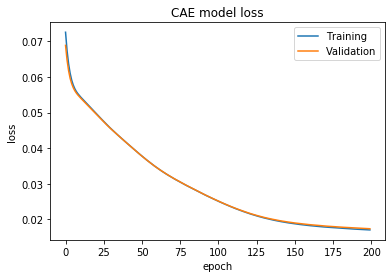

In [48]:
# CAE loss
plt.plot(ae_train['loss'])
plt.plot(ae_train['val_loss'])
plt.title('CAE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [49]:
loss = pd.DataFrame(ae_train['loss'])
loss.describe()

,0
count,200.000000
mean,0.029721
std,0.012799
min,0.017072
25%,0.018829
50%,0.025205
75%,0.037880
max,0.072575


In [50]:
val_loss = pd.DataFrame(ae_train['val_loss'])
val_loss.describe()

,0
count,200.000000
mean,0.029741
std,0.012492
min,0.017404
25%,0.019056
50%,0.025245
75%,0.037855
max,0.068888


In [51]:
# create encoded data
encoded_data = encoder.predict(x_test)
#decoded_data = decoder.predict(encoded_data)

# transform to SOM input type
encoded_som = pd.DataFrame(encoded_data)
#decoded_som = pd.DataFrame(decoded_data)

In [52]:
encoded_data.mean()

0.79766583

In [53]:
encoded_som.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.944791,0.826066,0.0,0.0,0.0,1.052547,1.758963,0.000000,2.258051,0.0,2.279328,2.331589
1,2.215151,0.131307,0.0,0.0,0.0,2.537620,0.876586,0.000000,0.000000,0.0,0.335007,2.017787
2,0.680979,1.608862,0.0,0.0,0.0,1.159663,0.649761,1.996020,0.000000,0.0,0.000000,2.644471
3,0.000000,0.325800,0.0,0.0,0.0,0.000000,0.000000,2.028079,0.710731,0.0,2.954616,1.111267
4,0.000000,1.305335,0.0,0.0,0.0,0.425506,3.485317,1.421772,1.219794,0.0,1.521893,0.795483


In [54]:
nonzero = list(map(lambda i: any(encoded_data[:,i] != 0), range(encoded_data.shape[1])))

encoded_som_nonzero = pd.DataFrame(encoded_data[:,nonzero])

encoded_som_nonzero.tail()

,0,1,2,3,4,5,6,7
405,0.953424,0.823370,1.059648,1.758754,0.000000,2.251103,2.272204,2.327313
406,0.009724,0.574174,2.722368,0.118066,0.965843,0.000000,2.493709,2.469431
407,1.420167,0.887110,0.000000,1.418706,0.139652,2.166840,0.000000,2.128346
408,0.000000,1.309697,0.435070,3.520647,1.415735,1.225957,1.553437,0.794334
409,1.627320,2.877653,0.000000,1.861414,0.888510,0.000000,1.305366,1.873148


In [55]:
encoded_som_nonzero.to_csv(path_or_buf='./dim064_CAE_encoded.csv',index= False)

# Denoising Autoencoder

In [56]:
############ Denoiding Autoencoder ###########

# add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

input_dim = x_train.shape[1]
input_layer = Input(shape=(input_dim, ))

encoding_dim = 12
#learning_rate = 1e-7

encoded = Dense(encoding_dim, activation='relu')(input_layer)

decoded = Dense(input_dim, activation='sigmoid')(encoded)

# implenment an autoencoder, creat encoder and decoder

autoencoder = Model(input_layer, decoded)

encoder = Model(input_layer, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
                                             
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

ae_train = autoencoder.fit(x_train_noisy, x_train,
                epochs=200,
                batch_size=128,
                shuffle=False,
                validation_data=(x_test_noisy, x_test)
                ).history

Train on 614 samples, validate on 410 samples
Epoch 1/200
614/614 [==============================] - 0s 467us/step - loss: 0.0705 - val_loss: 0.0678
Epoch 2/200
614/614 [==============================] - 0s 15us/step - loss: 0.0664 - val_loss: 0.0644
Epoch 3/200
614/614 [==============================] - 0s 19us/step - loss: 0.0633 - val_loss: 0.0619
Epoch 4/200
614/614 [==============================] - 0s 18us/step - loss: 0.0610 - val_loss: 0.0600
Epoch 5/200
614/614 [==============================] - 0s 18us/step - loss: 0.0593 - val_loss: 0.0586
Epoch 6/200
614/614 [==============================] - 0s 17us/step - loss: 0.0580 - val_loss: 0.0575
Epoch 7/200
614/614 [==============================] - 0s 19us/step - loss: 0.0570 - val_loss: 0.0567
Epoch 8/200
614/614 [==============================] - 0s 16us/step - loss: 0.0562 - val_loss: 0.0560
Epoch 9/200
614/614 [==============================] - 0s 19us/step - loss: 0.0555 - val_loss: 0.0554
Epoch 10/200
614/614 [=============

614/614 [==============================] - 0s 28us/step - loss: 0.0298 - val_loss: 0.0335
Epoch 160/200
614/614 [==============================] - 0s 27us/step - loss: 0.0297 - val_loss: 0.0335
Epoch 161/200
614/614 [==============================] - 0s 21us/step - loss: 0.0296 - val_loss: 0.0334
Epoch 162/200
614/614 [==============================] - 0s 18us/step - loss: 0.0296 - val_loss: 0.0334
Epoch 163/200
614/614 [==============================] - 0s 17us/step - loss: 0.0295 - val_loss: 0.0334
Epoch 164/200
614/614 [==============================] - 0s 20us/step - loss: 0.0295 - val_loss: 0.0333
Epoch 165/200
614/614 [==============================] - 0s 19us/step - loss: 0.0294 - val_loss: 0.0333
Epoch 166/200
614/614 [==============================] - 0s 19us/step - loss: 0.0294 - val_loss: 0.0333
Epoch 167/200
614/614 [==============================] - 0s 19us/step - loss: 0.0293 - val_loss: 0.0332
Epoch 168/200
614/614 [==============================] - 0s 19us/step - loss: 

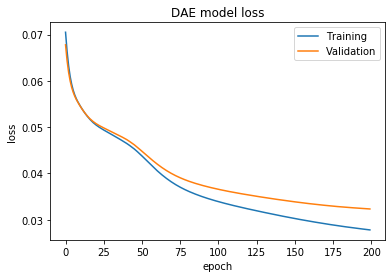

In [57]:
# DAE loss
plt.plot(ae_train['loss'])
plt.plot(ae_train['val_loss'])
plt.title('DAE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [58]:
loss = pd.DataFrame(ae_train['loss'])
loss.describe()

,0
count,200.000000
mean,0.037420
std,0.009075
min,0.027787
25%,0.030289
50%,0.033943
75%,0.043844
max,0.070522


In [59]:
val_loss = pd.DataFrame(ae_train['val_loss'])
val_loss.describe()

,0
count,200.000000
mean,0.039768
std,0.007599
min,0.032316
25%,0.033885
50%,0.036599
75%,0.044852
max,0.067807


In [60]:
# create encoded data
encoded_data = encoder.predict(x_test)
#decoded_data = decoder.predict(encoded_data)

# transform to SOM input type
encoded_som = pd.DataFrame(encoded_data)
#decoded_som = pd.DataFrame(decoded_data)

In [61]:
encoded_data.mean()

1.1746352

In [62]:
encoded_som.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.220984,1.940642,0.0,1.684275,0.227641,2.449126,2.147067,2.170053,0.077559,0.763158,1.757728,0.069888
1,1.968812,3.238817,0.0,3.066789,0.177035,0.000000,1.960600,1.780434,0.000000,0.000000,2.018597,0.000000
2,2.230328,2.980853,0.0,1.748695,0.027787,0.283013,0.436139,0.000000,0.651146,1.272934,1.782294,0.231273
3,0.724967,0.982878,0.0,2.447081,1.968588,1.663136,1.662016,0.366428,0.000000,2.738567,1.752355,0.000000
4,2.403010,0.861354,0.0,2.147466,1.117492,2.956586,0.906854,0.000000,0.995451,0.000000,2.915187,0.090498


In [63]:
nonzero = list(map(lambda i: any(encoded_data[:,i] != 0), range(encoded_data.shape[1])))

encoded_som_nonzero = pd.DataFrame(encoded_data[:,nonzero])

encoded_som_nonzero.tail()

,0,1,2,3,4,5,6,7,8,9,10
405,2.219769,1.950292,1.690442,0.237050,2.436228,2.159743,2.174981,0.071580,0.754923,1.758039,0.071856
406,1.522994,2.516430,2.984616,0.584416,1.243248,1.594074,0.000000,0.000000,2.151968,0.118128,0.544539
407,1.757012,2.006558,1.151283,0.379375,0.731454,1.155770,2.568758,0.000000,0.228847,2.802526,1.681634
408,2.416167,0.865532,2.142457,1.115771,2.990214,0.908190,0.000000,1.003806,0.000000,2.889506,0.093890
409,1.023318,1.953173,1.978827,0.274079,0.919832,1.057205,0.241212,2.710854,0.673560,0.669287,2.101536


In [64]:
encoded_som_nonzero.to_csv(path_or_buf='./dim064_DAE_encoded.csv',index= False)

# Convolutional Autoencoder

In [238]:
input_dim = x_train.shape[1]

# tranform the input format, add a dimension
x_train_con = x_train.as_matrix()
x_train_con = np.reshape(x_train_con, (-1, input_dim, 1))
x_text_con = x_test.as_matrix()
x_text_con = np.reshape(x_text_con, (-1, input_dim, 1))

input_layer = Input(shape=(input_dim,1))

x = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
x = MaxPooling1D(4, padding='same')(x)
x = Conv1D(16, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(4, padding='same')(x)
x = Conv1D(4, 3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(2, padding='same')(x)


x = Conv1D(4, 3, activation='relu', padding='same')(encoded)
x = UpSampling1D(2)(x)
x = Conv1D(16, 3, activation='relu', padding='same')(x)
x = UpSampling1D(4)(x)
x = Conv1D(32, 3, activation='relu', padding='same')(x)
x = UpSampling1D(4)(x)
decoded = Conv1D(1, 1, activation='sigmoid')(x)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')




In [239]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_65 (InputLayer)        (None, 64, 1)             0         
_________________________________________________________________
conv1d_306 (Conv1D)          (None, 64, 32)            128       
_________________________________________________________________
max_pooling1d_133 (MaxPoolin (None, 16, 32)            0         
_________________________________________________________________
conv1d_307 (Conv1D)          (None, 16, 16)            1552      
_________________________________________________________________
max_pooling1d_134 (MaxPoolin (None, 4, 16)             0         
_________________________________________________________________
conv1d_308 (Conv1D)          (None, 4, 4)              196       
_________________________________________________________________
max_pooling1d_135 (MaxPoolin (None, 2, 4)              0         
__________

In [240]:
ae_train = autoencoder.fit(x_train_con, x_train_con,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(x_text_con, x_text_con),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')]).history

Train on 614 samples, validate on 410 samples
Epoch 1/200
614/614 [==============================] - 1s 2ms/step - loss: 0.0578 - val_loss: 0.0573
Epoch 2/200
614/614 [==============================] - 0s 118us/step - loss: 0.0565 - val_loss: 0.0560
Epoch 3/200
614/614 [==============================] - 0s 124us/step - loss: 0.0554 - val_loss: 0.0557
Epoch 4/200
614/614 [==============================] - 0s 121us/step - loss: 0.0554 - val_loss: 0.0557
Epoch 5/200
614/614 [==============================] - 0s 130us/step - loss: 0.0551 - val_loss: 0.0554
Epoch 6/200
614/614 [==============================] - 0s 133us/step - loss: 0.0550 - val_loss: 0.0554
Epoch 7/200
614/614 [==============================] - 0s 121us/step - loss: 0.0550 - val_loss: 0.0553
Epoch 8/200
614/614 [==============================] - 0s 121us/step - loss: 0.0549 - val_loss: 0.0552
Epoch 9/200
614/614 [==============================] - 0s 125us/step - loss: 0.0548 - val_loss: 0.0552
Epoch 10/200
614/614 [=======

614/614 [==============================] - 0s 125us/step - loss: 0.0448 - val_loss: 0.0454
Epoch 158/200
614/614 [==============================] - 0s 116us/step - loss: 0.0448 - val_loss: 0.0454
Epoch 159/200
614/614 [==============================] - 0s 133us/step - loss: 0.0448 - val_loss: 0.0454
Epoch 160/200
614/614 [==============================] - 0s 115us/step - loss: 0.0448 - val_loss: 0.0454
Epoch 161/200
614/614 [==============================] - 0s 115us/step - loss: 0.0448 - val_loss: 0.0455
Epoch 162/200
614/614 [==============================] - 0s 119us/step - loss: 0.0448 - val_loss: 0.0454
Epoch 163/200
614/614 [==============================] - 0s 112us/step - loss: 0.0448 - val_loss: 0.0454
Epoch 164/200
614/614 [==============================] - 0s 118us/step - loss: 0.0448 - val_loss: 0.0454
Epoch 165/200
614/614 [==============================] - 0s 115us/step - loss: 0.0448 - val_loss: 0.0454
Epoch 166/200
614/614 [==============================] - 0s 114us/ste

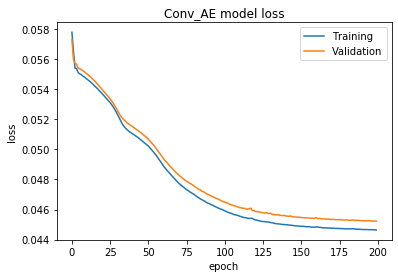

In [260]:
# Con_AE loss
plt.plot(ae_train['loss'])
plt.plot(ae_train['val_loss'])
plt.title('Conv_AE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [242]:
loss = pd.DataFrame(ae_train['loss'])
loss.describe()

,0
count,200.000000
mean,0.047674
std,0.003464
min,0.044647
25%,0.044894
50%,0.045932
75%,0.050242
max,0.057788


In [243]:
val_loss = pd.DataFrame(ae_train['val_loss'])
val_loss.describe()

,0
count,200.000000
mean,0.048182
std,0.003342
min,0.045225
25%,0.045482
50%,0.046512
75%,0.050706
max,0.057305


In [244]:
encoded_data = encoder.predict(x_text_con)

In [245]:
encoded_data.shape

(410, 2, 4)

In [246]:
# create encoded data

encoded_data = encoded_data.reshape(-1, 2*4)

# transform to SOM input type
encoded_som = pd.DataFrame(encoded_data)
#decoded_som = pd.DataFrame(decoded_data)

In [247]:
encoded_data.mean()

1.3529571

In [248]:
encoded_som.head()

,0,1,2,3,4,5,6,7
0,1.619695,3.798434,0.000000,0.974055,0.000000,1.843804,0.339530,2.324364
1,1.212742,2.632632,0.000000,1.092621,0.685427,3.347438,0.280657,1.907474
2,0.040923,2.643014,0.353879,0.381635,0.512060,1.497391,0.118033,1.597433
3,0.986684,4.391051,0.170206,0.582877,0.511271,1.523611,0.661759,2.568826
4,1.049106,3.626737,0.000000,1.891596,0.866574,2.053646,0.000000,1.282843


In [249]:
nonzero = list(map(lambda i: any(encoded_data[:,i] != 0), range(encoded_data.shape[1])))

encoded_som_nonzero = pd.DataFrame(encoded_data[:,nonzero])

encoded_som_nonzero.tail()

,0,1,2,3,4,5,6,7
405,1.636510,3.797700,0.000000,0.977368,0.000000,1.834277,0.326925,2.319141
406,0.305329,3.746118,0.000000,0.691917,0.378015,1.846060,0.601684,1.798794
407,1.097444,2.695361,0.000000,1.129987,0.449520,2.808614,0.646239,2.579397
408,1.050361,3.620308,0.000000,1.931498,0.849957,2.073496,0.000000,1.274005
409,0.819094,2.803680,0.293457,1.181901,1.253280,2.726597,0.619012,1.926305


In [250]:
encoded_som_nonzero.to_csv(path_or_buf='./dim064_ConAE_encoded.csv',index= False)